<a href="https://colab.research.google.com/github/rogerioag/tutorial-de-compiladores/blob/master/tppcompiler/04-compiladores-geracao-de-codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementação de Compiladores**
## Geração de Código

In [1]:
!pip install ply
!pip install anytree

     |████████████████████████████████| 51kB 825kB/s 
     |████████████████████████████████| 51kB 908kB/s 


In [2]:
from llvmlite import ir
from llvmlite import binding as llvm

In [5]:
llvm.initialize()
llvm.initialize_all_targets()
llvm.initialize_native_target()
llvm.initialize_native_asmprinter()



module.triple = llvm.get_process_triple()

target = llvm.Target.from_triple(module.triple)
target_machine = target.create_target_machine()

module.data_layout = target_machine.target_data



llvm.shutdown()

# Criação de um Módulo

In [9]:
from llvmlite import ir

'''
Este módulo contém uma função main e criação de um array unidimensional como variável global e outro como local.
Será gerado um código em LLVM como este em C:
<<Colocar o Código do Exemplo de Referência.>>
'''

# Cria o módulo.
module = ir.Module('meu_modulo.bc')
module.triple = llvm.get_process_triple()
target = llvm.Target.from_triple(module.triple)
target_machine = target.create_target_machine()
module.data_layout = target_machine.target_data

# Código do Módulo.

# Salva o Módulo.
arquivo = open('meu_modulo.ll', 'w')
arquivo.write(str(module))
arquivo.close()
print(module)

; ModuleID = "meu_modulo.bc"
target triple = "x86_64-unknown-linux-gnu"
target datalayout = "e-m:e-i64:64-f80:128-n8:16:32:64-S128"



In [ ]:
'''
Este módulo contém uma função main, declarações de variáveis, operações e atribuições
Será gerado um código em LLVM como este em C:
int g;
float h;
int main(){
  int a = 1;
  float b = 1.0;
  
  g = 10;
  h = 10.0;
  a = a + 10;
  b = b + h;
  
  return 0;
}
'''

'\nEste módulo contém uma função main, declarações de variáveis, operações e atribuições\nSerá gerado um código em LLVM como este em C:\nint g;\nfloat h;\nint main(){\n  int a = 1;\n  float b = 1.0;\n  \n  g = 10;\n  h = 10.0;\n  a = a + 10;\n  b = b + h;\n  \n  return 0;\n}\n'

In [ ]:
# Cria o módulo.
module = ir.Module('meu_modulo.bc')

In [ ]:
# Variável inteira global g
g = ir.GlobalVariable(module, ir.IntType(32),"g")
# Inicializa a variavel g
g.initializer = ir.Constant(ir.IntType(32), 0)
# Linkage = common
g.linkage = "common"
# Define o alinhamento em 4
g.align = 4

# Variável float global h
h = ir.GlobalVariable(module, ir.FloatType(),"h")
# Inicializa a variavel h
h.initializer =  ir.Constant(ir.FloatType(), 0.0)
# Linkage = common
h.linkage = "common"
# Define o alinhamento em 4
h.align = 4

# Define o retorno da função main
Zero32 = ir.Constant(ir.IntType(32), 0)
# Cria função main
t_func_main = ir.FunctionType(ir.IntType(32), ())
# Declara função main
main = ir.Function(module, t_func_main, name='main')

# Declara o bloco de entrada
entryBlock = main.append_basic_block('entry')
endBasicBlock = main.append_basic_block('exit')

# Adiciona o bloco de entrada
builder = ir.IRBuilder(entryBlock)

# Cria o valor de retorno e inicializa com zero
returnVal = builder.alloca(ir.IntType(32), name='retorno')
builder.store(Zero32, returnVal)

# int a = 1;
# float b = 1.0

# Variável inteira 'a'
# Aloca na memória variável a do tipo inteiro com nome 'a'
a = builder.alloca(ir.IntType(32), name="a")
# Define o alinhamento
a.align = 4
# Cria uma constante pra armazenar o numero 1
num1 = ir.Constant(ir.IntType(32),1)
# Armazena o 1 na variave 'a'
builder.store(num1, a)

# Variavel float b
# Aloca na memoria 
b = builder.alloca(ir.FloatType(), name="b")
# Define o alinhamento
b.align = 4
# Cria uma constante pra armazenar o numero 1
num1Float = ir.Constant(ir.FloatType(), 1.0)
# Armazena o 1.0 na variavel 'b'
builder.store(num1Float, b)

# g = 10
# Outra maneira de fazer o store (sem precisar criar constante pra armazenar numero)
builder.store( ir.Constant(ir.IntType(32), 10) , g )

# h = 10.0
builder.store( ir.Constant(ir.FloatType(), 10.0) , h )

# a = a + 10
a_temp = builder.load(a, "")
num10 = ir.Constant(ir.IntType(32), 10)
temp = builder.add(a_temp, num10, name='temp', flags=())
# Armazena o temp (a + 10) no a
builder.store(temp, a)

# b = b + h
b_temp = builder.load(b, "")
h_temp = builder.load(h,"")
temp2 = builder.fadd( b_temp , h_temp , name='temp2', flags=())
# Armazena temp2 em b
builder.store(temp2, b)

# Cria um salto para o bloco de saída
builder.branch(endBasicBlock)

# Adiciona o bloco de saida
builder.position_at_end(endBasicBlock)

# return 0
# Cria o return
returnVal_temp = builder.load(returnVal, name='', align=4)
builder.ret(returnVal_temp)

<ir.Ret '.14' of type 'void', opname 'ret', operands [<ir.LoadInstr '.13' of type 'i32', opname 'load', operands [<ir.AllocaInstr 'retorno' of type 'i32*', opname 'alloca', operands ()>]>]>

In [ ]:
arquivo = open('vars.ll', 'w')
arquivo.write(str(module))
arquivo.close()
print(module)

; ModuleID = "meu_modulo.bc"
target triple = "unknown-unknown-unknown"
target datalayout = ""

@"g" = common global i32 0, align 4
@"h" = common global float              0x0, align 4
define i32 @"main"() 
{
entry:
  %"retorno" = alloca i32
  store i32 0, i32* %"retorno"
  %"a" = alloca i32, align 4
  store i32 1, i32* %"a"
  %"b" = alloca float, align 4
  store float 0x3ff0000000000000, float* %"b"
  store i32 10, i32* @"g"
  store float 0x4024000000000000, float* @"h"
  %".7" = load i32, i32* %"a"
  %"temp" = add i32 %".7", 10
  store i32 %"temp", i32* %"a"
  %".9" = load float, float* %"b"
  %".10" = load float, float* @"h"
  %"temp2" = fadd float %".9", %".10"
  store float %"temp2", float* %"b"
  br label %"exit"
exit:
  %".13" = load i32, i32* %"retorno", align 4
  ret i32 %".13"
}



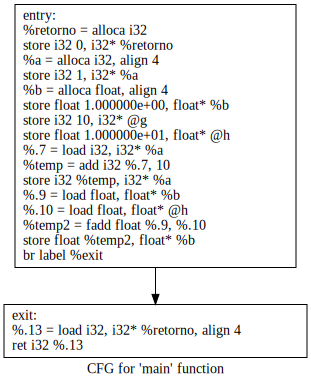

In [ ]:
dot = llvm.get_function_cfg(main)
llvm.view_dot_graph(dot)